In [1]:
# Install required libraries (if not already installed)
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [5]:
# Load the dataset
from google.colab import files
uploaded = files.upload()  # Upload the dataset CSV file

Saving Updated_Bus_IoT_Dataset.csv to Updated_Bus_IoT_Dataset.csv


In [6]:
# Read the dataset into a DataFrame
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

In [7]:
# Display dataset info
print("Dataset Head:")
print(df.head())
print("\nData Info:")
print(df.info())

Dataset Head:
  Bus Register No       Date                    Bus Model  Bus Route  \
0          SP8812  7/18/2023  Ashok Leyland Viking Euro 4        101   
1          SP3462  4/17/2023  Ashok Leyland Viking Euro 4        120   
2          SP2676  12/4/2023  Ashok Leyland Viking Euro 4        100   
3          SP4236   8/4/2023  Ashok Leyland Viking Euro 4        100   
4          SP1150  6/24/2023  Ashok Leyland Viking Euro 4        190   

     Mileage  Fuel Efficiency  Days since last Repair  \
0   17275.34             3.42                     196   
1  298648.70             2.84                     184   
2   54067.61             4.68                      62   
3  147658.31             3.85                     224   
4  149429.42             4.22                     218   

                                        Engine Model  \
0  H'Series 6 cylinder H Series Turbo Charged CRS...   
1  H'Series 6 cylinder H Series Turbo Charged CRS...   
2  H'Series 6 cylinder H Series Turbo Char

Data preprocessing

<ipython-input-8-e4181e4089f9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=service_required_counts.index, y=service_required_counts.values, palette="Blues")


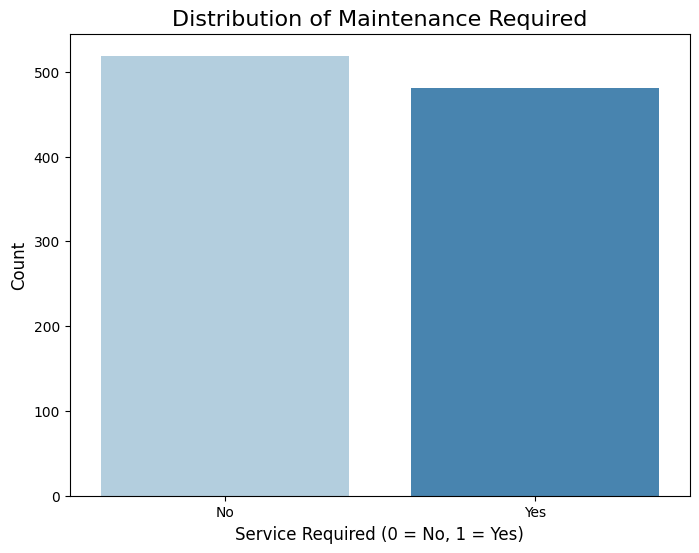

In [8]:
# Distribution of 'Service Required'
service_required_counts = df['Service Required'].value_counts()

# Bar plot for distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=service_required_counts.index, y=service_required_counts.values, palette="Blues")
plt.title("Distribution of Maintenance Required", fontsize=16)
plt.xlabel("Service Required (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0, 1], ["No", "Yes"], fontsize=10)
plt.show()

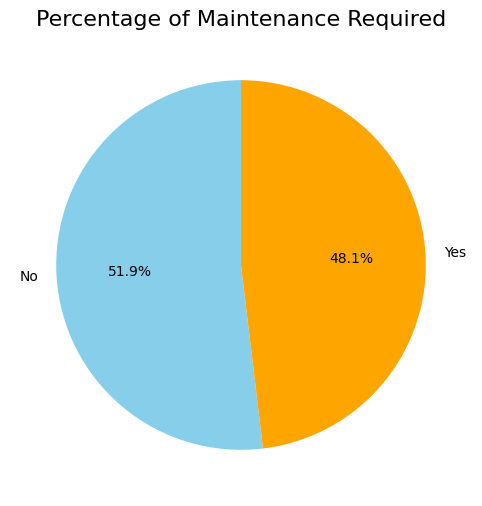

In [9]:
plt.figure(figsize=(8, 6))
service_required_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["skyblue", "orange"], labels=["No", "Yes"])
plt.title("Percentage of Maintenance Required", fontsize=16)
plt.ylabel("")  # Remove y-label for pie chart
plt.show()

In [10]:
# Handle missing values (if any)
df.fillna(df.median(numeric_only=True), inplace=True)

In [11]:
# Encoding categorical columns
categorical_cols = ["Bus Register No", "Bus Route", "Engine Model", "Gearbox Type", "Seating Layout",
                    "Brake System", "Tyre Type", "Last Service Type", "Service Type"]
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

Feature Selection

In [12]:
# Feature selection: continuous, categorical, temporal, event-based
continuous_features = ["Mileage", "Fuel Efficiency", "Oil Level", "Brake Wear"]
categorical_features = ["Bus Route", "Seating Layout", "Brake System", "Tyre Type", "Last Service Type"]
temporal_features = ["Days since last Repair"]
event_based_features = ["Service Required"]

In [13]:
# Data scaling for continuous features
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

Train the Random Forest Model

In [14]:
# Train-test split
X = df[continuous_features + categorical_features + temporal_features]
y = df["Service Required"]  # Target variable for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluation

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.48      0.53      0.50       102
        True       0.45      0.40      0.42        98

    accuracy                           0.47       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.46      0.47      0.46       200

Confusion Matrix:


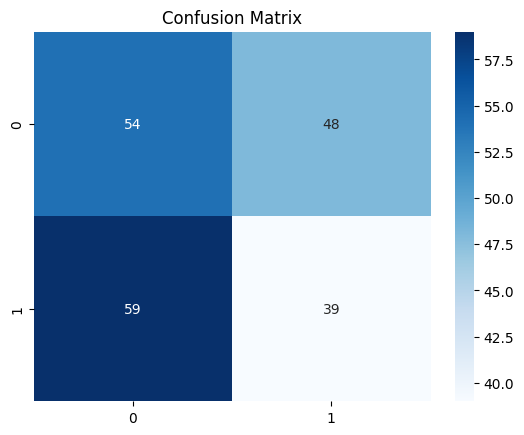

In [16]:
# Evaluate Random Forest classifier
y_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.show()

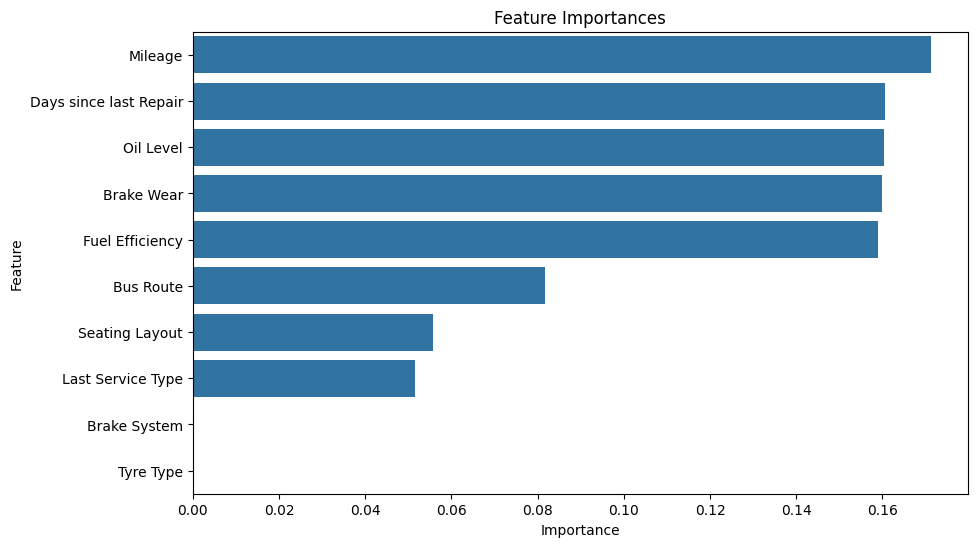

In [17]:
# Feature importance visualization
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
feature_importances.sort_values(by="Importance", ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x="Importance", y="Feature")
plt.title("Feature Importances")
plt.show()

Random Forest Accuracy with 25 trees: 49.50%
Random Forest Accuracy with 50 trees: 49.50%
Random Forest Accuracy with 75 trees: 46.00%


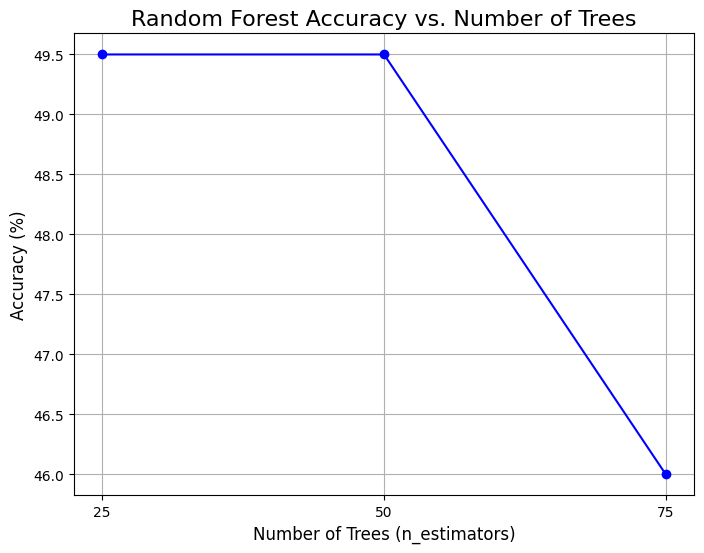

In [18]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest with different numbers of trees (25, 50, 75)
estimators = [25, 50, 75]
accuracies = {}

for n in estimators:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)  # Train the model
    y_pred = rf_model.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracies[n] = accuracy * 100  # Convert to percentage

# Display the accuracies
for n, acc in accuracies.items():
    print(f"Random Forest Accuracy with {n} trees: {acc:.2f}%")

# Plot the accuracies
plt.figure(figsize=(8, 6))
plt.plot(estimators, list(accuracies.values()), marker='o', linestyle='-', color='blue')
plt.title("Random Forest Accuracy vs. Number of Trees", fontsize=16)
plt.xlabel("Number of Trees (n_estimators)", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(estimators)
plt.grid()
plt.show()


**LSTM** **Model**

Method 1

Data preprocessing

Data prepocessing

In [22]:
# Prepare data for LSTM model (Predicting time until maintenance is required)
X_lstm = df[continuous_features + categorical_features].values
y_lstm = df["Days since last Repair"].values

In [23]:
# Reshape for LSTM
X_lstm = X_lstm.reshape((X_lstm.shape[0], 1, X_lstm.shape[1]))

Train the LSTM Model

In [24]:
# Train-test split for LSTM
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

In [25]:
# Build the LSTM model
lstm_model = Sequential([
    LSTM(64, activation="relu", input_shape=(X_lstm.shape[1], X_lstm.shape[2])),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(1)
])
lstm_model.compile(optimizer="adam", loss="mse", metrics=["mae"])
history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 45374.1250 - mae: 185.0029 - val_loss: 42816.3555 - val_mae: 179.2468
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 45324.5625 - mae: 185.3564 - val_loss: 41485.7461 - val_mae: 175.5542
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 41755.3477 - mae: 175.8595 - val_loss: 37314.9297 - val_mae: 164.4782
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38096.8008 - mae: 165.9308 - val_loss: 28487.2559 - val_mae: 140.2227
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24730.7969 - mae: 127.5058 - val_loss: 18361.5293 - val_mae: 111.8676
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18042.7207 - mae: 110.6152 - val_loss: 15219.5811 - val_mae: 101.9050
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15908.7324 - mae: 103.6838 - val_loss: 14974.9502 - val_mae: 101.2034
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17105.9863 - mae: 108.7184 - val_loss: 14791.2285 - val_

Evaluation

In [26]:
# Evaluate LSTM model
loss, mae = lstm_model.evaluate(X_test_lstm, y_test_lstm, verbose=0)
print(f"LSTM Model Evaluation:\nLoss: {loss}\nMean Absolute Error: {mae}")

LSTM Model Evaluation:
Loss: 12688.6376953125
Mean Absolute Error: 94.67565155029297


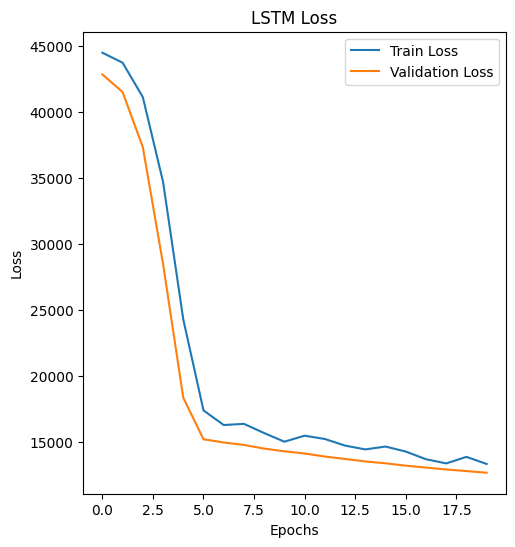

In [27]:
# Plot accuracy and loss for LSTM
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("LSTM Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

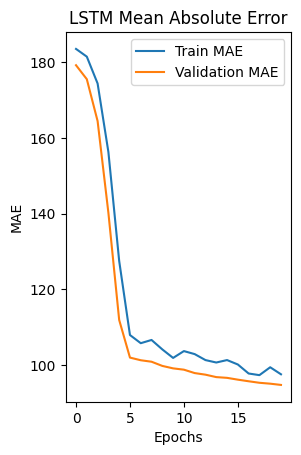

In [28]:
plt.subplot(1, 2, 2)
plt.plot(history.history["mae"], label="Train MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.title("LSTM Mean Absolute Error")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

Calculate Accuracy

In [29]:
# Build the LSTM model
lstm_model = Sequential([
    LSTM(64, activation="relu", input_shape=(X_lstm.shape[1], X_lstm.shape[2])),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")  # Binary output for classification
])

# Compile the model
lstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model for 75 epochs but capture metrics at 50 and 75 epochs
history = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    epochs=75,  # Train for 75 epochs
    batch_size=32,
    validation_data=(X_test_lstm, y_test_lstm),
    verbose=1
)

# Accuracy for 50 and 75 epochs
accuracy_50 = history.history['accuracy'][49] * 100  # Accuracy at epoch 50
accuracy_75 = history.history['accuracy'][74] * 100  # Accuracy at epoch 75

# Print the accuracies
print(f"Accuracy at 50 epochs: {accuracy_50:.2f}%")
print(f"Accuracy at 75 epochs: {accuracy_75:.2f}%")

Epoch 1/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.0000e+00 - loss: -54.1772 - val_accuracy: 0.0000e+00 - val_loss: -212.2386
Epoch 2/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: -324.1609 - val_accuracy: 0.0000e+00 - val_loss: -836.3253
Epoch 3/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: -1250.0784 - val_accuracy: 0.0000e+00 - val_loss: -2861.3406
Epoch 4/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: -3899.7773 - val_accuracy: 0.0000e+00 - val_loss: -8205.5264
Epoch 5/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: -10660.7900 - val_accuracy: 0.0000e+00 - val_loss: -19451.4609
Epoch 6/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: -24196.0820 - val_accuracy: 0.0000e+00 - val_loss: -39079.1914
Epoch 7/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: -47417.5859 - val_accuracy: 0.0000e+00 - val_loss: -69055.1719
Epoc

Method 2

In [30]:
# Ensure continuous features are scaled between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])


In [20]:
# Ensure 'Service Required' is binary (0 or 1)
df["Service Required"] = df["Service Required"].astype(int)

In [31]:
# Updated LSTM architecture
lstm_model = Sequential([
    LSTM(32, activation="relu", input_shape=(X_lstm.shape[1], X_lstm.shape[2])),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")  # Binary classification
])

lstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
# Reshape for LSTM (1 timestep if no sequence data)
X_lstm = df[continuous_features + categorical_features].values
X_lstm = X_lstm.reshape((X_lstm.shape[0], 1, X_lstm.shape[1]))

y_lstm = df["Service Required"].values


In [33]:
from tensorflow.keras.optimizers import Adam

# Compile with a smaller learning rate
lstm_model.compile(optimizer=Adam(learning_rate=0.0005), loss="binary_crossentropy", metrics=["accuracy"])


In [34]:
print(df["Service Required"].value_counts())

Service Required
0    519
1    481
Name: count, dtype: int64


In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_lstm.reshape(-1, X_lstm.shape[2]), y_lstm)
X_balanced = X_balanced.reshape((X_balanced.shape[0], 1, X_balanced.shape[1]))


In [36]:
history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=30, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 5.7119e-04 - loss: 32.8058 - val_accuracy: 0.0000e+00 - val_loss: -6.8070
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0034 - loss: -19.3568 - val_accuracy: 0.0000e+00 - val_loss: -57.8494
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -75.8782 - val_accuracy: 0.0000e+00 - val_loss: -128.1198
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -148.1112 - val_accuracy: 0.0000e+00 - val_loss: -239.7238
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -284.7389 - val_accuracy: 0.0000e+00 - val_loss: -431.8627
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -507.9769 - val_accuracy: 0.0000e+00 - val_loss: -753.6840
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -885.9827 - val_accuracy: 0.0000e+00 - val_loss: -1262.3417
Epoch 8/30
25/25 ━━━━━━━━━━━━